# Simple Pandas Feature Engineering (GroupBy & Joins)

### Overview
Feature engineering means transforming raw data into meaningful input features for a machine learning model.  
Two essential Pandas tools for this are **`groupby()`** (to summarize information) and **`merge()`** (to combine datasets).  
Both help transform raw tables into structured, model-ready features.

---

### 1. `groupby()` → Aggregate Information
`groupby()` lets us summarize data for each group, capturing important statistics like:
- total or average behavior per category (e.g., total sales per store)
- user-level statistics (e.g., average spending per customer)
- count-based features (e.g., number of transactions per user)

These aggregations reveal high-level patterns and trends in the data.

---

### 2. `merge()` → Combine Multiple Sources
`merge()` joins different DataFrames using a common key (like `user_id` or `product_id`),  
allowing us to enrich our dataset with additional attributes or aggregated features.  
This is crucial in real ML workflows where data often comes from multiple sources.

Example uses:
- Merging user profiles with transaction logs  
- Combining aggregated summaries (from `groupby`) back into the main dataset  
- Creating a unified feature table for model training


In [1]:
import pandas as pd

In [2]:
# sample data

sales = pd.DataFrame({
    'customer_id': [1, 2, 1, 3, 2, 3],
    'product_id': [101, 102, 103, 101, 104, 102],
    'quantity': [2, 1, 3, 1, 2, 4],
    'price': [100, 200, 150, 100, 250, 200],
    'date': pd.to_datetime(['2024-01-01','2024-01-01','2024-01-02',
                            '2024-01-02','2024-01-03','2024-01-03'])
})


customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'city': ['NY', 'SF', 'LA']
})

In [3]:
sales.head()

,customer_id,product_id,quantity,price,date
0,1,101,2,100,2024-01-01
1,2,102,1,200,2024-01-01
2,1,103,3,150,2024-01-02
3,3,101,1,100,2024-01-02
4,2,104,2,250,2024-01-03


In [4]:
customers.head()

,customer_id,city
0,1,NY
1,2,SF
2,3,LA


# Feature Engineering

In [7]:
# 1. Total spend per transaction
sales['total_spend'] = sales['quantity'] * sales['price']

In [8]:
# 2. Aggregate features per customer
agg_features = (
    sales.groupby('customer_id')
         .agg(total_orders=('product_id', 'count'),
              total_spend=('total_spend', 'sum'),
              avg_order_value=('total_spend', 'mean'))
         .reset_index()
)

In [14]:
# 3. Join with customer info
customer_features = pd.merge(customers, agg_features, on='customer_id', how='left')

In [17]:
print("Aggregated customer features")
customer_features.head()

--------Aggregated customer features-------------


,customer_id,city,total_orders,total_spend,avg_order_value
0,1,NY,2,650,325.0
1,2,SF,2,700,350.0
2,3,LA,2,900,450.0


In [10]:
# 4. Create time-based feature
sales['day_of_week'] = sales['date'].dt.day_name()

In [11]:
# 5. Feature: spending ratio of each transaction
sales = sales.merge(agg_features[['customer_id','total_spend']],
                    on='customer_id', how='left', suffixes=('', '_cust'))
sales['spend_ratio'] = sales['total_spend'] / sales['total_spend_cust']

In [13]:
sales.head()

,customer_id,product_id,quantity,price,date,total_spend,day_of_week,total_spend_cust,spend_ratio
0,1,101,2,100,2024-01-01,200,Monday,650,0.307692
1,2,102,1,200,2024-01-01,200,Monday,700,0.285714
2,1,103,3,150,2024-01-02,450,Tuesday,650,0.692308
3,3,101,1,100,2024-01-02,100,Tuesday,900,0.111111
4,2,104,2,250,2024-01-03,500,Wednesday,700,0.714286


In [18]:
print("\nSales with engineered features:")
print(sales[['customer_id', 'product_id', 'day_of_week', 'total_spend', 'spend_ratio']])


Sales with engineered features:
   customer_id  product_id day_of_week  total_spend  spend_ratio
0            1         101      Monday          200     0.307692
1            2         102      Monday          200     0.285714
2            1         103     Tuesday          450     0.692308
3            3         101     Tuesday          100     0.111111
4            2         104   Wednesday          500     0.714286
5            3         102   Wednesday          800     0.888889


# Visualization

In [19]:
import matplotlib.pyplot as plt

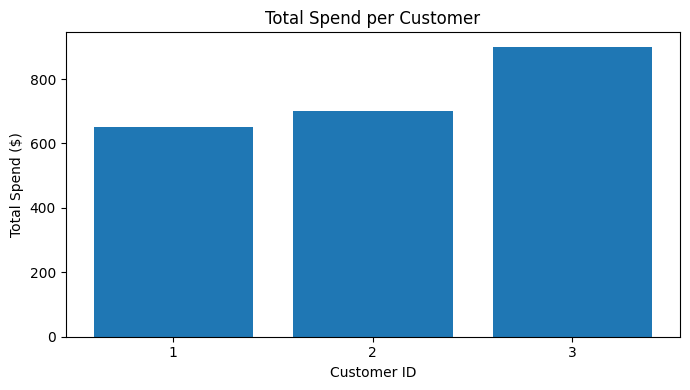

In [26]:
# --- Plot aggregated customer features ---

ids = customer_features['customer_id'].astype(str) # converting from numeric to categorical
y   = customer_features['total_spend']

plt.figure(figsize=(7,4))
plt.bar(ids, y)
plt.title('Total Spend per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend ($)')
plt.tight_layout()
plt.show()


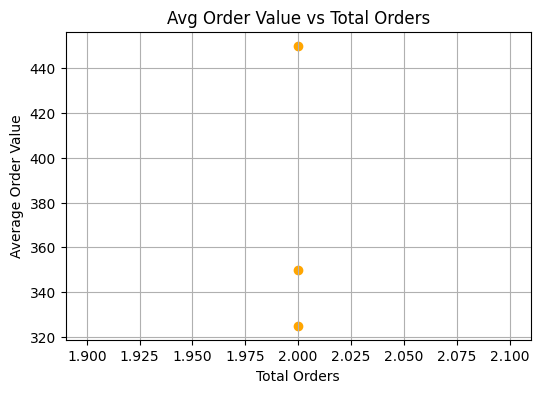

In [21]:
# --- Plot average order value vs total orders ---

plt.figure(figsize=(6,4))
plt.scatter(customer_features['total_orders'], customer_features['avg_order_value'], color='orange')
plt.title('Avg Order Value vs Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Average Order Value')
plt.grid(True)
plt.show()

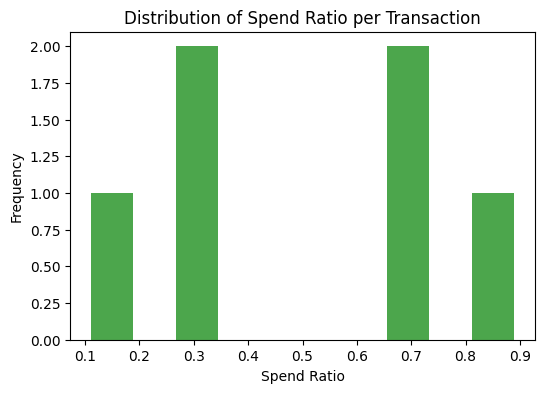

In [25]:
# --- Plot spend ratio distribution from sales ---
plt.figure(figsize=(6,4))
plt.hist(sales['spend_ratio'], bins=10, color='green', alpha=0.7)
plt.title('Distribution of Spend Ratio per Transaction')
plt.xlabel('Spend Ratio')
plt.ylabel('Frequency')
plt.show()

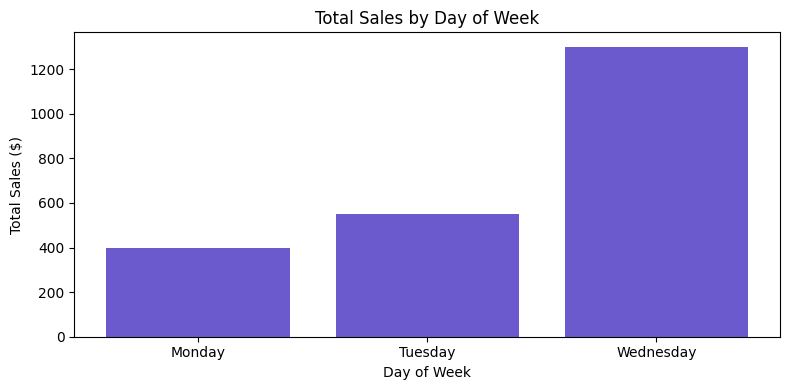

In [27]:
# --- Aggregate total sales by weekday ---

weekday_sales = (
    sales.groupby('day_of_week')['total_spend']
         .sum()
         .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
         .dropna()
)


# --- Plot total sales by weekday ---
plt.figure(figsize=(8,4))
plt.bar(weekday_sales.index, weekday_sales.values, color='slateblue')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

In [55]:
from types import new_class
from typing import List
class Solution:
    def longestCommonPrefix(self, strs: List[str]) -> str:

        if not strs:
            return ""

        prefix = strs[0]
        print(f'prefix: {prefix}')
        for s in strs[1:]:
            print("s: ",s)
            while not s.startswith(prefix):
                prefix = prefix[:-1]
                print("new prefix: ", prefix)
                if not prefix:
                    return ""
        return prefix

In [57]:
from types import new_class
from typing import List
class Solution:
    def longestCommonPrefix(self, strs: List[str]) -> str:

        if not strs:
            return ""

        prefix = strs[0]

        for s in strs[1:]:

            if not s.startswith(prefix):
                prefix = prefix[:-1]

                if not prefix:
                    return ""
        return prefix